## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

## Data Load

In [3]:
# Define the path to the Excel file
file_path = r"C:\Users\Administrator\Downloads\Views data.xlsx"

# Define the sheet name to read data from
sheet_name = 'Churn Data'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   12210-AND    Male   66      No  Andhra Pradesh                    9   
1   12531-AND    Male   56      No  Andhra Pradesh                    1   
2   13500-BIH    Male   51      No           Bihar                    9   
3   14399-MAD  Female   56     Yes  Madhya Pradesh                    8   
4   14622-PUN  Female   49     Yes          Punjab                    9   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31        NaN            No             No  ...   
1                12        NaN            No             No  ...   
2                18        NaN            No             No  ...   
3                 9        NaN            No             No  ...   
4                15        NaN            No             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      34.299999    577.150024           0.0   
1  Bank Wi

## Data Preprocessing

In [4]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

data.head(5)

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Male,66,No,Andhra Pradesh,9,31,NaN,No,No,Yes,...,Month-to-Month,Yes,Credit Card,34.299999,577.150024,0.0,0,0.0,577.150024,Stayed
1,Male,56,No,Andhra Pradesh,1,12,NaN,No,No,Yes,...,Two Year,Yes,Bank Withdrawal,62.500000,4136.399902,0.0,0,0.0,4136.399902,Stayed
2,Male,51,No,Bihar,9,18,NaN,No,No,Yes,...,One Year,Yes,Credit Card,56.400002,2928.500000,0.0,0,0.0,2928.500000,Stayed
3,Female,56,Yes,Madhya Pradesh,8,9,NaN,No,No,Yes,...,One Year,No,Credit Card,35.450001,1958.949951,0.0,0,0.0,1958.949951,Stayed
4,Female,49,Yes,Punjab,9,15,NaN,No,No,Yes,...,Month-to-Month,No,Bank Withdrawal,34.250000,163.550003,0.0,0,0.0,163.550003,Stayed


In [5]:
# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]


# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

data.head(10)

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,1,66,0,0,9,31,5,0,0,1,...,0,1,1,34.299999,577.150024,0.0,0,0.0,577.150024,Stayed
1,1,56,0,0,1,12,5,0,0,1,...,2,1,0,62.500000,4136.399902,0.0,0,0.0,4136.399902,Stayed
2,1,51,0,2,9,18,5,0,0,1,...,1,1,1,56.400002,2928.500000,0.0,0,0.0,2928.500000,Stayed
3,0,56,1,11,8,9,5,0,0,1,...,1,0,1,35.450001,1958.949951,0.0,0,0.0,1958.949951,Stayed
4,0,49,1,15,9,15,5,0,0,1,...,0,0,0,34.250000,163.550003,0.0,0,0.0,163.550003,Stayed
5,0,60,0,5,6,19,5,0,0,1,...,2,0,1,63.900002,3334.949951,0.0,0,0.0,3334.949951,Stayed
6,1,55,0,16,0,10,5,0,0,1,...,0,0,1,42.400002,146.399994,0.0,0,0.0,146.399994,Stayed
7,0,56,0,16,8,33,5,0,0,1,...,2,1,0,63.799999,4684.299805,0.0,0,0.0,4684.299805,Stayed
8,1,38,0,9,13,24,5,0,0,1,...,2,1,1,61.200001,4390.250000,0.0,0,0.0,4390.250000,Stayed
9,0,38,1,19,1,19,5,0,0,1,...,2,0,0,45.049999,2560.100098,0.0,0,0.0,2560.100098,Stayed


In [6]:
data['Customer_Status'].unique()

array(['Stayed', 'Churned'], dtype=object)

In [7]:
print(data.columns)

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')


In [8]:
# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

data.head()

In [9]:
# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

 

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Random Forest Model

Confusion Matrix:
[[813  49]
 [141 199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       862
           1       0.80      0.59      0.68       340

    accuracy                           0.84      1202
   macro avg       0.83      0.76      0.79      1202
weighted avg       0.84      0.84      0.83      1202



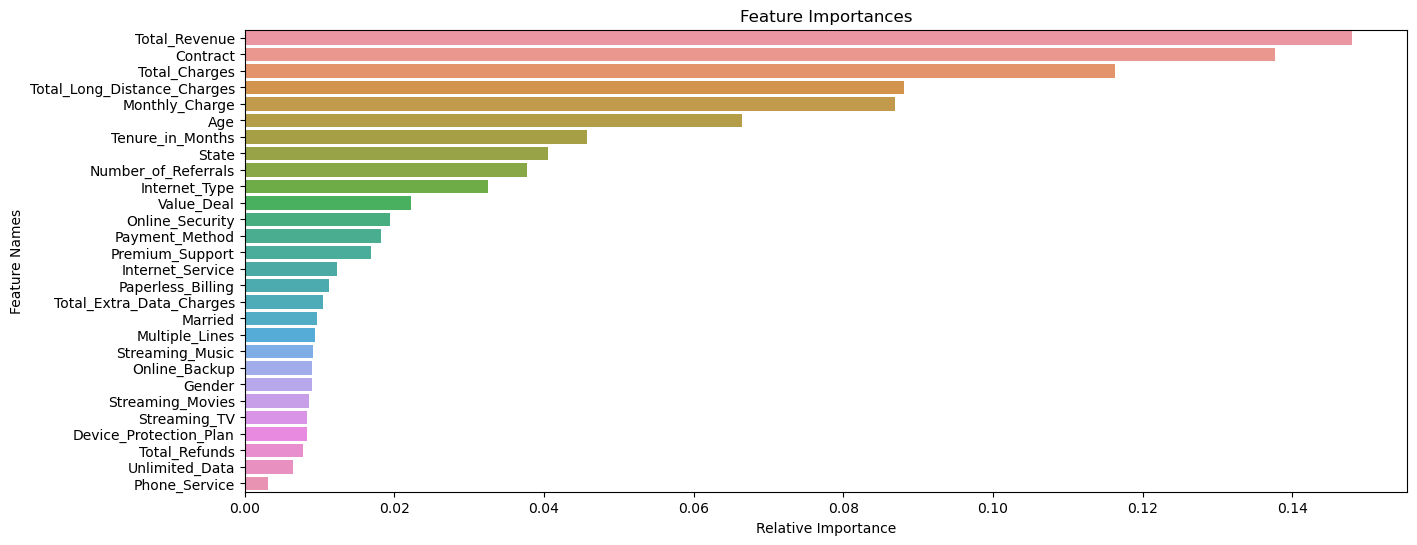

In [10]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

 

# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 

# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

## Use Model for Prediction of New Data

In [11]:
# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\Administrator\Downloads\Views data.xlsx"

 

# Define the sheet name to read data from

sheet_name = 'Join Data'

 

# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel(file_path, sheet_name=sheet_name)

 

# Display the first few rows of the fetched data

print(new_data.head())

 

# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

 

# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']

 

# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

 

# Make predictions

new_predictions = rf_model.predict(new_data)

 

# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

 

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

# Save the results

original_data.to_csv(r"C:\Users\Administrator\Downloads\Predictions.csv", index=False)

  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   12257-ASS  Female   39      No          Assam                    9   
1   13946-HAR  Female   41     Yes        Haryana                    1   
2   14567-TAM    Male   43      No     Tamil Nadu                    1   
3   15591-KAR  Female   26      No      Karnataka                    3   
4   15803-UTT  Female   34      No  Uttar Pradesh                    6   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 1        NaN           Yes             No  ...   
1                 3     Deal 5           Yes             No  ...   
2                 9        NaN           Yes             No  ...   
3                31        NaN           Yes             No  ...   
4                31        NaN           Yes             No  ...   

  Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0    Credit Card      19.549999     19.549999           0.0   
1    Credit Card    